In [13]:
import pandas as pd
import plotly.express as px

# Load your emissions data
# Adjust the path to your actual file location
data = pd.read_csv('/historical_emissions.csv')

# Select relevant columns and filter for the year 2018
data_2018 = data[['Country', '2018']].copy()
data_2018.columns = ['Country', 'Emissions']

# Create a choropleth map
fig = px.choropleth(
    data_frame=data_2018,
    locations='Country',  # Column with country names
    locationmode='country names',  # Use 'country names' for full names
    color='Emissions',  # Column with CO2 emissions
    color_continuous_scale='YlOrRd',  # Color scale from yellow to red
    title='Global CO2 Emissions in 2018',
    labels={'Emissions': 'CO2 Emissions (MtCO₂e)'},
    projection='natural earth',
    range_color=[35, 10000]  # Set the range for the color scale
)

# Show the plot
fig.show()


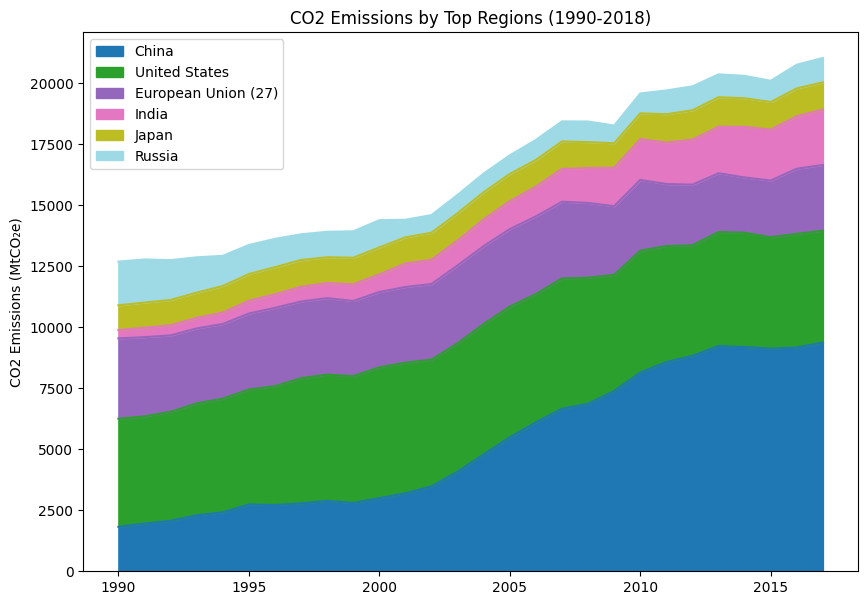

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the emissions data (replace with your correct path)
emissions_data = pd.read_csv('/historical_emissions.csv')

# Drop unnecessary columns ('Data source', 'Sector', 'Gas', 'Unit')
emissions_data = emissions_data.drop(columns=['Data source', 'Sector', 'Gas', 'Unit'])

# Convert the year columns to numeric
emission_years = emissions_data.columns[1:]  # Columns representing years (starting from 1990)
emissions_data[emission_years] = emissions_data[emission_years].apply(pd.to_numeric, errors='coerce')
# Filter emissions for top contributing countries
top_countries = ['China', 'United States', 'India', 'European Union (27)', 'Russia', 'Japan']
top_emissions = emissions_data[emissions_data['Country'].isin(top_countries)]
top_emissions = top_emissions.set_index('Country').T[1:]

top_emissions= top_emissions.iloc[::-1]


# Stacked area plot for top countries' emissions over time
top_emissions.plot(kind='area', figsize=(10, 7), stacked=True, colormap='tab20')
plt.title('CO2 Emissions by Top Regions (1990-2018)')
plt.ylabel('CO2 Emissions (MtCO₂e)')
plt.legend(loc='upper left')
plt.show()
